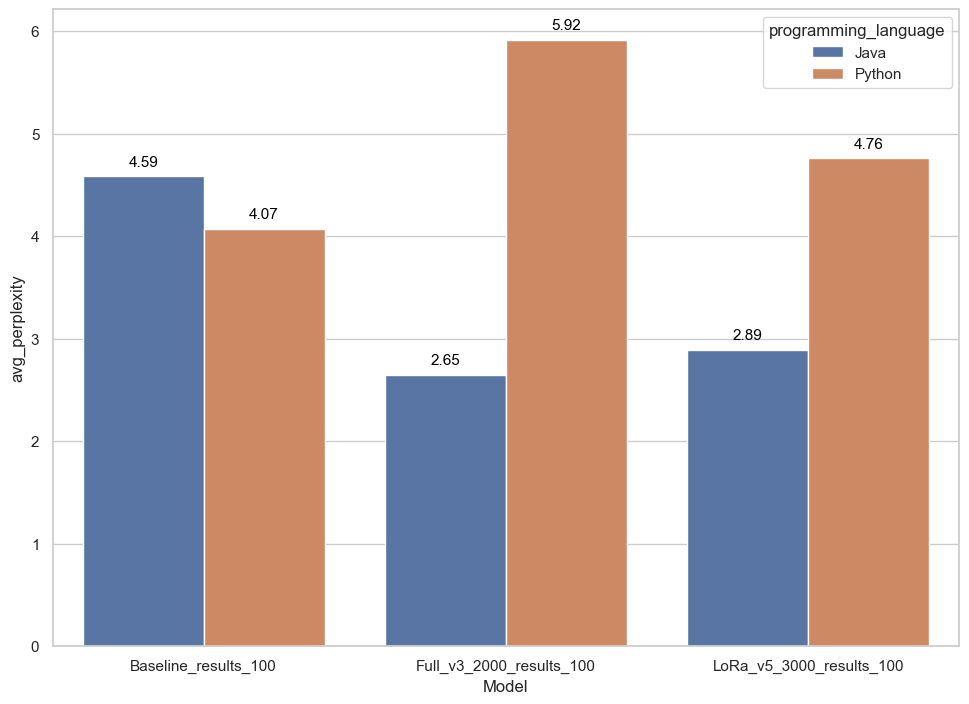

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Read the folder names inside the results folder
results_dir = './results'
models_dirs = os.listdir(results_dir)
# print(models_dirs)

# Read the results json files that are inside each folder 
results = {}
for model_dir in models_dirs:
    model_dir_path = os.path.join(results_dir, model_dir)
    results[model_dir] = {}
    for file in os.listdir(model_dir_path):
        if file.endswith('.json'):
            file_path = os.path.join(model_dir_path, file)
            with open(file_path, 'r') as f:
                results[model_dir][file[:-5]] = json.load(f)


df_dict = {
    'Model': [],
    'programming_language': [],
    'license': [],
    'stride': [],
    'avg_perplexity': []
}

for model_dir in results:
    for file in results[model_dir]:
        if 'short' in file:
            continue
        df_dict['Model'].append(model_dir)
        df_dict['programming_language'].append(file.split('_')[1])
        df_dict['license'].append(file.split('_')[2])
        df_dict['stride'].append(file.split('_')[3])
        df_dict['avg_perplexity'].append(results[model_dir][file]['avg_perplexity'])

df = pd.DataFrame(df_dict)
df['avg_perplexity'] = df['avg_perplexity'].astype(float)
df['stride'] = df['stride'].astype(int)
df['Model'] = df['Model'].astype(str)
df['programming_language'] = df['programming_language'].astype(str)
df['license'] = df['license'].astype(str)

#drop license column
df = df.drop(columns=['license'])

#drop stride column
df = df.drop(columns=['stride'])

#create new df_dict
df_dict = {
    'Model': [],
    'programming_language': [],
    'avg_perplexity': []
}

#group by model and programming language
df_grouped = df.groupby(['Model', 'programming_language']).mean().reset_index()

#add to df_dict
df_dict['Model'] = df_grouped['Model']
df_dict['programming_language'] = df_grouped['programming_language']
df_dict['avg_perplexity'] = df_grouped['avg_perplexity']

#convert to dataframe
df = pd.DataFrame(df_dict)
# model_name_dict = {
#     'base': 'Baseline',
#     'codegne-finetuned-Full-the-stack-java-v2-checkpoint-400': 'Full-400-v2',
#     'codegne-finetuned-Full-the-stack-java-v2-checkpoint-800': 'Full-800-v2',
#     'codegne-finetuned-LoRa-the-stack-java-v2-checkpoint-800': 'LoRa-800-v2',
#     'codegne-finetuned-LoRa-the-stack-java-v3-checkpoint-800': 'LoRa-800-v3',
# }
# #rename model names in df 
# new_model_names = []
# for model_name in df['Model']:
#     new_model_names.append(model_name_dict[model_name])
# df['Model'] = new_model_names


# Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Model", y="avg_perplexity", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#writing the perplexity values on top of the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
        textcoords='offset points')
plt.show()

In [4]:
df.Model.unique()

array(['base', 'codegne-finetuned-Full-the-stack-java-v2-checkpoint-400',
       'codegne-finetuned-Full-the-stack-java-v2-checkpoint-800',
       'codegne-finetuned-LoRa-the-stack-java-v2-checkpoint-800',
       'codegne-finetuned-LoRa-the-stack-java-v3-checkpoint-800'],
      dtype=object)

In [9]:
#drop rows with Full-400 model
df = df[df['Model'] != 'Full-400']

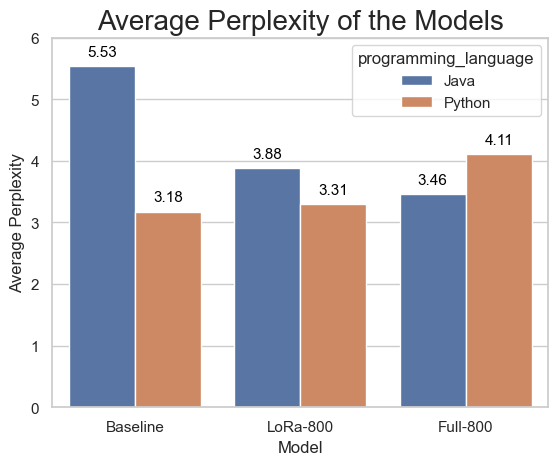

In [15]:
import os

figs_dir = '../../figs'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)
fig_name = f"{figs_dir}/perplexity_results.png"
# Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Model", y="avg_perplexity", hue="programming_language", data=df)
#Set the y-axis scale
ax.set(ylim=(0, 6))
#writing the perplexity values on top of the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
        textcoords='offset points')
# Add axis names
ax.set_xlabel('Model')
ax.set_ylabel('Average Perplexity')
# Add title with larger font
ax.set_title('Average Perplexity of the Models', fontdict={'fontsize': 20})
# Save the figure
plt.savefig(fig_name, bbox_inches='tight')
# Show the figure
plt.show()

